In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

In [3]:
file = open(r'Arquivos/' + 'A602.pickle' , 'rb')
X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(file)

In [4]:
# Concatenando as bases de treino e validação
X_train = np.vstack((X_train, X_val))
y_train = np.vstack((y_train, y_val))

In [5]:
# Ajustando o target de treino
y_train[y_train == 0] = 0
y_train[(y_train > 0) & (y_train <= 5)] = 1
y_train[(y_train > 5) & (y_train <= 25)] = 2
y_train[(y_train > 25) & (y_train <= 50)] = 3
y_train[y_train > 50] = 4

In [6]:
# Ajustando o terget de teste
y_test[y_test == 0] = 0
y_test[(y_test > 0) & (y_test <= 5)] = 1
y_test[(y_test > 5) & (y_test <= 25)] = 2
y_test[(y_test > 25) & (y_test <= 50)] = 3
y_test[y_test > 50] = 4

In [18]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('clf', GradientBoostingClassifier())  # Substitua SeuEstimador pelo estimador que você está usando
])

In [22]:
param_grid = {
    'pca__n_components': list(range(1, X_train.shape[1]))
}

In [25]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())
melhor_numero_componentes = grid_search.best_params_['pca__n_components']

c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ipand\miniconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ipand\mini

In [26]:
grid_search.best_params_['pca__n_components']

1

In [41]:
pca = PCA(n_components=grid_search.best_params_['pca__n_components'])
X_pca = pca.fit_transform(X_test)

In [42]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

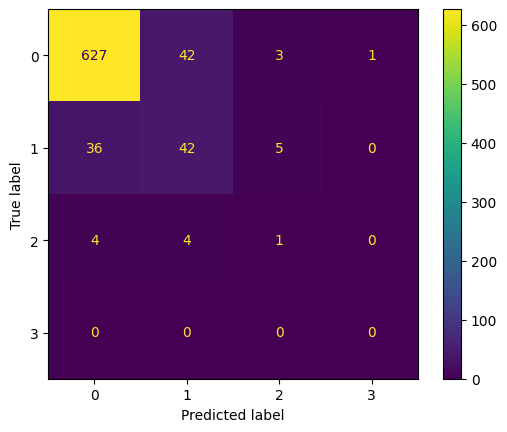

In [43]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()